# Séries Temporais

## Principais Técnicas:

**Decomposição de Séries Temporais:** Separa uma série temporal em seus componentes básicos, como tendência, sazonalidade e resíduos (ou ruído). Isso ajuda a entender melhor a dinâmica da série e facilita a modelagem e previsão.

**Médias Móveis:** Técnica de suavização que calcula a média de um número fixo de pontos de dados consecutivos para criar uma nova série temporal suavizada. Isso ajuda a reduzir o ruído e identificar tendências de longo prazo.

**Suavização Exponencial:**  Técnica de suavização que atribui  pesos  exponencialmente  decrescentes  aos  pontos  de  dados  anteriores.  Isso  dá  mais importância aos dados mais recentes e ajuda a identificar tendências e padrões de curto prazo.

**Modelos Autorregressivos (AR):** São modelos lineares que usam os valores passados da própria série temporal para prever valores futuros. O número de valores passados usados no modelo é chamado de ordem do modelo AR.

**Modelos de Médias Móveis (MA):** Os modelos de médias móveis são modelos lineares que usam os resíduos  passados (erros de previsão) para prever valores futuros. O número de resíduos passados usados no modelo é chamado de ordem do modelo MA.

**Modelos  ARIMA**  (Autoregressive  Integrated  Moving  Average): combinam elementos dos modelos AR e MA e também incluem a diferenciação para tornar a série temporal estacionária. São amplamente utilizados para previsão de séries temporais e podem lidar com tendências e sazonalidades.

**Modelos SARIMA** (Seasonal ARIMA): Estendem os modelos ARIMA para  incluir  termos  sazonais,  tornando-os  adequados  para  séries  temporais  com  padrões sazonais claros.

**Modelos de Espaço de Estados:** São uma abordagem mais geral para modelar séries temporais que podem incluir modelos lineares e não lineares, bem como modelos com efeitos fixos e aleatórios. Exemplos: modelos de suavização exponencial de Holt-Winters e modelos de Kalman.

**Métodos de Aprendizado de Máquina:** Além das técnicas estatísticas tradicionais, os métodos de aprendizado de máquina, como redes neurais, máquinas de vetores de suporte e árvores de decisão, também podem ser usados para modelar e prever séries temporais. Esses métodos geralmente requerem a transformação dos dados de séries temporais em um formato adequado para modelagem de aprendizado de máquina.


# Análise de Séries Temporais com python

## Carregando os dados e bibliotecas

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [40]:
df = pd.read_csv('arquivos/dataset_17.csv')
df.shape

(365, 2)

In [41]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


## Pré-Processamento

In [42]:
df.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [44]:
print(df['Data'].min())
print(df['Data'].max())

2023-01-01
2023-12-31


In [45]:
df['Data'] = pd.to_datetime(df['Data'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [46]:
serie_temporal = df.set_index("Data")["Total_Vendas"]
type(serie_temporal)

pandas.core.series.Series

In [47]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

## Análise Exploratória 

A decomposição da série temporal pode ser feita em 4 partes:  Série, Tendencia, sazonalidade e ruído

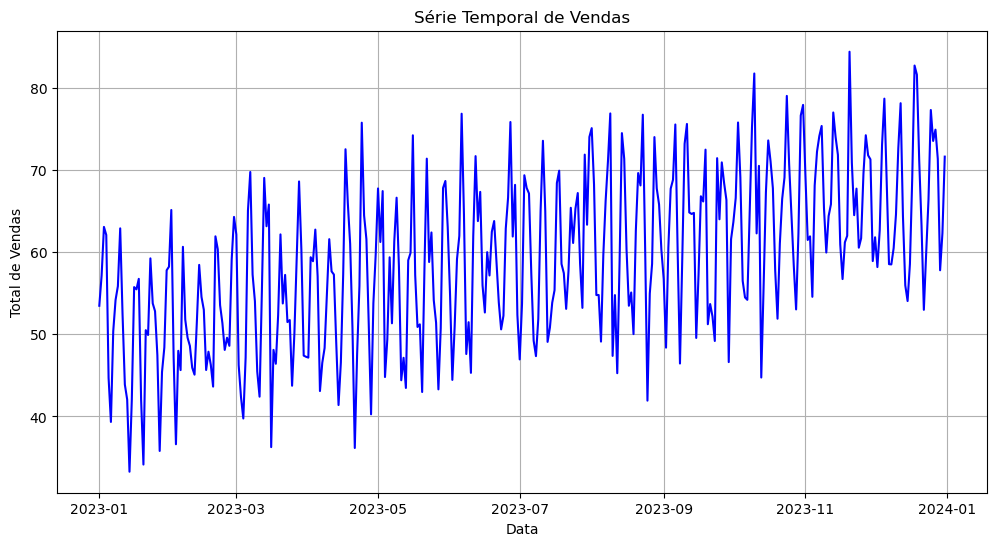

In [48]:
# Criar gráfico de série temporal
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, color='blue')
plt.title('Série Temporal de Vendas')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.grid(True)

## Suavização exponencial
Técnica de análise e previsão de séries temporais que aplica *médias ponderadas* aos dados históricos, onde os pesos diminuem exponencialmente à medida que os dados ficam mais antigos. A suavização exponencial é útil para lidar com tendências e sazonalidades nos dados, e para reduzir o ruído.


### Suposições da Suavização Exponencial

https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html



No Statsmodels, a classe SimpleExpSmoothing é uma implementação da técnica de suavização exponencial simples, que é uma versão mais básica da suavização exponencial que não lida explicitamente com tendências e sazonalidades.

O modelo SimpleExpSmoothing do Statsmodels, também conhecido como suavização exponencial simples ou média móvel exponencialmente ponderada, é uma técnica de suavização de séries temporais que atribui pesos decrescentes exponencialmente aos pontos de dados passados. Ele é usado principalmente para suavizar séries temporais e fazer previsões de curto prazo. As principais suposições do modelo SimpleExpSmoothing são as seguintes:

- A série temporal é composta por um componente de nível (média) e um componente de erro aleatório (ruído). Não há componentes de tendência ou sazonalidade na série.


- O componente de nível é uma média ponderada dos valores passados, com pesos que diminuem exponencialmente à medida que os dados ficam mais distantes no passado.


- O componente de erro aleatório é normalmente distribuído com média zero e variância constante. Além disso, os erros são independentes e identicamente distribuídos.


- O parâmetro de suavização (alfa) é uma constante entre 0 e 1, que determina a taxa de decaimento dos pesos. Valores próximos a 1 dão maior peso aos dados mais recentes, enquanto valores próximos a 0 dão mais peso aos dados mais antigos.

O modelo SimpleExpSmoothing é uma técnica de suavização bastante simples que tem suas limitações. Ele é mais adequado para séries temporais que não apresentam tendências ou sazonalidades claras e para fazer previsões de curto prazo. Para séries temporais com componentes de tendência e/ou sazonalidade, modelos mais avançados como o ExponentialSmoothing de Holt-Winters ou modelos SARIMA podem ser mais apropriados.

### Criar modelo 

In [49]:
modelo = SimpleExpSmoothing(serie_temporal)

modelo_ajustado = modelo.fit(smoothing_level = 0.2)

c:\Users\prisc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


O argumento ``smoothing_level=0.2`` define o parâmetro de suavização (alfa) como 0.2. O parâmetro de suavização controla a rapidez com que os pesos decrescem ao longo do tempo; um valor maior atribui mais peso aos dados mais recentes, enquanto um valor menor atribui mais peso aos dados mais antigos. O valor de alfa deve estar entre 0 e 1.

In [50]:
suav_exponencial = modelo_ajustado.fittedvalues

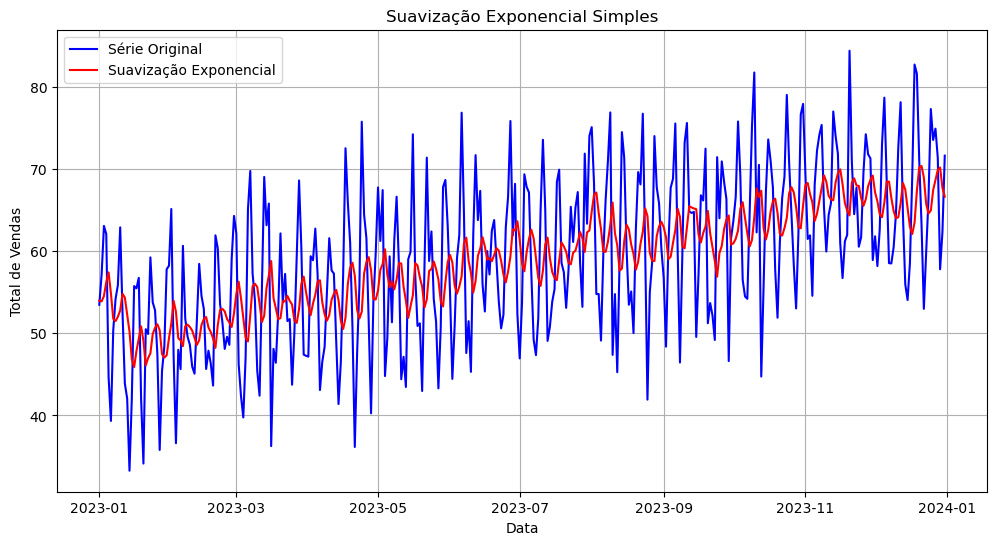

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, color='blue', label='Série Original')
plt.plot(suav_exponencial, color='red', label='Suavização Exponencial')
plt.title('Suavização Exponencial Simples')
plt.xlabel('Data')  
plt.ylabel('Total de Vendas')
plt.legend()
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [52]:
previsoes = modelo_ajustado.forecast(steps = 1)

In [53]:
previsoes

2024-01-01    67.649892
Freq: D, dtype: float64